<a href="https://colab.research.google.com/github/oluwamark/compx310/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Matthew Christensen 1631625 Lab 3

https://colab.research.google.com/drive/1EKeMbQHTgWMLrUvXTOBENVzsolxS4hbg?usp=sharing

##Part 1

###1A - Import data

In [1]:
import pandas as pd

id = 1631625
url = "https://raw.githubusercontent.com/bpfa/data_for_compx310_2023/main/wisconsin_breast_cancer.csv"

bc = pd.read_csv(url)
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   adhesion   699 non-null    int64  
 5   single     699 non-null    int64  
 6   nuclei     683 non-null    float64
 7   chromatin  699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   mitosis    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


###1B - Remove incomplete samples and drop 'id' from dataframe

In [2]:
from sklearn.model_selection import train_test_split

# https://www.w3schools.com/python/pandas/ref_df_drop.asp
# use dropna() to remove rows with NaN values
bc = bc.dropna()
bc = bc.drop('id', axis=1)

###1C - Split into training, testing and validation sets

In [3]:
# splitting into features and class
X = bc.drop('class', axis=1)
y = bc['class']


# creating test and train splits
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.4, random_state=id, stratify=y)
Xte, Xval, yte, yval = train_test_split(Xte, yte, test_size=0.5, random_state=id, stratify=yte)

Xtr.shape, ytr.shape, Xte.shape, yte.shape, Xval.shape, yval.shape

((409, 9), (409,), (137, 9), (137,), (137, 9), (137,))

###1D - Logistic regression model

In [4]:
# https://www.geeksforgeeks.org/python/loop-or-iterate-over-all-or-certain-columns-of-a-dataframe-in-python-pandas/
# https://www.w3schools.com/python/python_ml_logistic_regression.asp
from sklearn.metrics import accuracy_score
from sklearn import linear_model

# functions from the COMPX310 moodle page
def on_bits(k, n):

  return [j for j in range(n) if ((1 << j) & k) > 0]

def nonempty_subsets(lst):

  n = len(lst)

  return [[lst[i] for i in on_bits(k, n)] for k in range(1, 1<<n)]

# create a list of all subsets in Xtr.columns, which itself is a list of the features
subsets = nonempty_subsets(list(Xtr.columns))

# some lists to store accuracies, and to store subsets with highest accuracy for each subset length
test_accuracies = []
val_accuracies = []
best_subsets = [0,0,0,0,0,0,0,0,0]
best_subsets_value = [0,0,0,0,0,0,0,0,0]

# create logistic regression model with random state = 1631625
logr = linear_model.LogisticRegression(random_state=id)

for subset in subsets:
  # create subset dataframe
  train_data = pd.DataFrame(Xtr[subset])
  # fit model to training data
  logr.fit(train_data, ytr)

  # create subset validation data frame
  test_data = pd.DataFrame(Xval[subset])
  # make predictions using model
  ypred = logr.predict(test_data)
  # append accuracy score to scores list
  va=accuracy_score(yval, ypred)
  val_accuracies.append(va)

  # create subset testing data frame
  test_data = pd.DataFrame(Xte[subset])
  # make predictions using model
  ypred = logr.predict(test_data)
  # append accuracy score to scores list
  ta = accuracy_score(yte, ypred)
  test_accuracies.append(ta)

  # https://www.w3schools.com/python/python_try_except.asp
  # tracks what length subset is in current loop iteration
  index = len(subset)-1

  # try catch to circumvent the TypeError which arises from trying to use sum() on int type
  # This is error occurs in the first 7 iterations of 'for subset in subsets'
  try:
    if va > best_subsets_value[index][0]:       # if validation accuracy of current subset is greater than va in best_subsets_value[i]
      best_subsets[index] = subset              # replace existing subset with current best subset
      best_subsets_value[index] = [va, ta]      # add validation and test accuracy of current best subset
  except TypeError:
    best_subsets[index] = subset                # same as above, accounts for above specified error
    best_subsets_value[index] = [va, ta]

###1E - Plotting

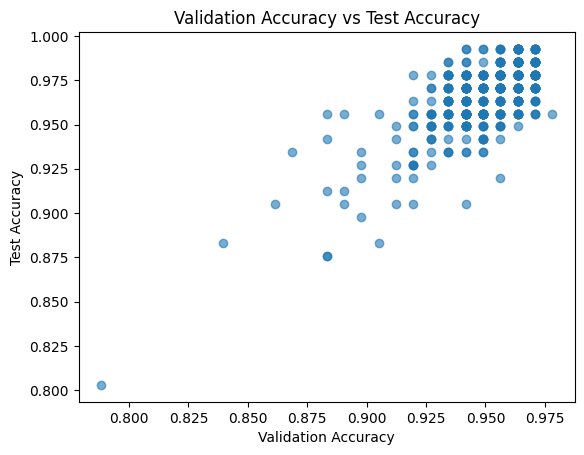

In [5]:
# comparing validationa and test accuracy with matplotlib scatter plot
import matplotlib.pyplot as plt

plt.scatter(val_accuracies, test_accuracies,alpha=0.6)
plt.xlabel('Validation Accuracy')
plt.ylabel('Test Accuracy')
plt.title('Validation Accuracy vs Test Accuracy')
plt.show()

An apparent relationship between validation and test accuracy can be seen in the *Validation Accuracy vs Test Accuracy* scatterplot. The graph suggests that there is a proportial relationship between the two values. The relationship is not very strong however. For example, models with a test accuracy of 0.925 varied in their validation accuracy; with values in the range (0.88, 0.95).

In [6]:
from prettytable import PrettyTable

# specify the Column Names while initializing the Table
table = PrettyTable(["Size", "Val Accuracy", "Test Accuracy", "Features"])

# constructing and display the 'prettytable'
for i in range(9):
  table.add_row([i+1, best_subsets_value[i][0], best_subsets_value[i][1], best_subsets[i]])
print(table)

+------+--------------------+--------------------+----------------------------------------------------------------------------------------------------+
| Size |    Val Accuracy    |   Test Accuracy    |                                              Features                                              |
+------+--------------------+--------------------+----------------------------------------------------------------------------------------------------+
|  1   | 0.9343065693430657 | 0.9343065693430657 |                                              ['size']                                              |
|  2   | 0.948905109489051  | 0.9416058394160584 |                                     ['thickness', 'adhesion']                                      |
|  3   | 0.9708029197080292 | 0.9562043795620438 |                                   ['shape', 'single', 'nuclei']                                    |
|  4   | 0.9708029197080292 | 0.9781021897810219 |                             ['thickne

##Part 2

In [7]:
# https://stackoverflow.com/questions/57924484/finding-coefficients-for-logistic-regression
# https://www.geeksforgeeks.org/python/python-convert-two-lists-into-a-dictionary/

# train model for part2
logr2 = linear_model.LogisticRegression(random_state=id)
logr2.fit(Xtr,ytr)

# get/display validation accuracy
ypred = logr2.predict(Xval)
full_val_accuracy = accuracy_score(yval, ypred)
print(f"Validation accuracy: {full_val_accuracy}")

# get/display test accuracy
ypred = logr2.predict(Xte)
full_test_accuracy = accuracy_score(yte, ypred)
print(f"Test accuracy: {full_test_accuracy}\n")

# display coefficients
fnames = list(Xtr.columns)
coefs = logr2.coef_[0]

for i in range(len(fnames)):
  print(f"{i} {fnames[i]}: {coefs[i]}")

Validation accuracy: 0.9708029197080292
Test accuracy: 0.9854014598540146

0 thickness: 0.41454211171372596
1 size: 0.2929778282319786
2 shape: 0.2593091682044185
3 adhesion: 0.20296372177591462
4 single: 0.1300909649036593
5 nuclei: 0.4354040806439208
6 chromatin: 0.2041441252347721
7 nucleoli: 0.2118258428624828
8 mitosis: 0.3249269038263579


Features at index = 0, 2, 5, and 7 have the highest coefficients. That is, 'thickness', 'shape', 'nuclei', and 'nucleoli'.

In [8]:
# create/train third logr model using 4 most significant features
logr3 = linear_model.LogisticRegression(random_state=id)
features = ['thickness','shape','nuclei','nucleoli']
logr3.fit(Xtr[features], ytr)

# get/display validation accuracy
ypred = logr3.predict(Xval[features])
partial_validation_accuracy =accuracy_score(yval, ypred)
print(f"Validation accuracy: {accuracy_score(yval, ypred)}")

# get/display test accuracy
ypred = logr3.predict(Xte[features])
partial_test_accuracy =accuracy_score(yte, ypred)
print(f"Test accuracy: {partial_test_accuracy}")

Validation accuracy: 0.9635036496350365
Test accuracy: 0.9781021897810219


Using the four most significant features results in equal test accuracy to the model using all features, but worse validation accuracy.

Using four features with the largest coefficients will not guarantee the most accurate model, since coefficient size does not directly indicate its significance (the range of values a particular feature may take could be much different to that of another feature, leading to varying coefficient size). Using coded coefficients, then choosing the four largest coefficients, may result in a more accurate model, but it is unlikely this method will produce the most accurate model.  

The model with the better validation accuracy does not have the better test accuracy (as the test accuracies are both the same).

https://stats.stackexchange.com/questions/202221/for-linear-classifiers-do-larger-coefficients-imply-more-important-features

##Part 3


In [9]:
# https://www.geeksforgeeks.org/machine-learning/logistic-regression-with-polynomial-features/
from prettytable import PrettyTable
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features using training dataset
poly = PolynomialFeatures(degree=2)  # You can change the degree as needed
Xtr_poly = poly.fit_transform(Xtr)
Xte_poly = poly.transform(Xte)
Xval_poly = poly.transform(Xval)

# create/train model using polynomial features
logr_poly = linear_model.LogisticRegression(random_state=id, max_iter=10000)
logr_poly.fit(Xtr_poly, ytr)

# validation accuracy
y_pred = logr_poly.predict(Xval_poly)
poly_validation_accuracy = accuracy_score(yval, y_pred)

# test accuracy
y_pred = logr_poly.predict(Xte_poly)
poly_test_accuracy = accuracy_score(yte, y_pred)

# specify the Column Names while initializing the Table
table = PrettyTable(["Method", "Val Accuracy", "Test Accuracy"])

# add rows
table.add_row(["All features", full_val_accuracy, full_test_accuracy])
table.add_row(["Best subset(s)", best_subsets_value[1][0], best_subsets_value[1][1]])
table.add_row(["Four features", partial_validation_accuracy, partial_test_accuracy])
table.add_row(["Polynomial Features", poly_validation_accuracy, poly_test_accuracy])

print(table)

+---------------------+--------------------+--------------------+
|        Method       |    Val Accuracy    |   Test Accuracy    |
+---------------------+--------------------+--------------------+
|     All features    | 0.9708029197080292 | 0.9854014598540146 |
|    Best subset(s)   | 0.948905109489051  | 0.9416058394160584 |
|    Four features    | 0.9635036496350365 | 0.9781021897810219 |
| Polynomial Features | 0.9343065693430657 | 0.9708029197080292 |
+---------------------+--------------------+--------------------+


(Taking best subset to mean subset with the highest validation accuracy.)

The highest *Val Accuracy* was achieved by three subsets of size n=2, n=3 n=4, all with a validation accuracy of 0.9708 (4dp). The size n=2 and n=4 models had test accuracies of 0.9416 (4dp), the size n=3 model had a test accuracy of 0.9489. These are not the highest observed test accuracies, so, choosing the model with the highest validation accuracy will not always guarantee best generalisation to other datasets (i.e. higher test accuracies).

The highest *Test Accuracy* achieved by any of the above models was 0.9854, achieved by the 'best' subsets of size n=8 and n=9 (see **Part 1E**).

###convert to pdf

In [11]:
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get update
!sudo apt-get install pandoc texlive-xetex texlive-fonts-recommended texlive-plain-generic -y
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab_Notebooks/Lab3.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://cli.github.com/packages stable/main amd64 Packages [346 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,085 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,468 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 ht